### The sane way of making compiling custome dataset for the geez-ocr

In [2]:
import os
import glob
import PIL
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import random
import pathlib
import shutil

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import metrics


def view(img):
    plt.imshow(img, cmap='gray')
    plt.show()
    
def vShape(var):
    print(var.shape)
    
def fidel(bet):
    # this method sort and prepare the geez table for standard use from unicode
    deqala1 = ['ቈ','ኈ','ኰ','ዀ','ጐ']
    deqala2 = ['ሏ','ሗ','ሟ','ሧ','ሯ','ሷ','ሿ','ቊ','ቧ','ቯ',
               'ቷ','ቿ','ኊ','ኗ','ኟ','ኧ','ኲ','ዂ','ዟ','ዧ',
               'ዷ','ጇ','ጒ','ጧ','ጯ','ጷ','ጿ','ፏ','ፗ']
    deqala3 =['ቋ','ኋ','ኳ','ዃ','ጓ']
    deqala4 = ['ቌ','ኌ','ኴ','ዄ','ጔ']
    deqala5 = ['ቍ','ኍ','ኵ','ዅ','ጕ']
    
    i=0;fidel = 4608;fideloch = []
    if bet==1: fidel = 4608
    elif bet==2: fidel = 4609
    elif bet==3: fidel = 4610
    elif bet==4: fidel = 4611
    elif bet==5: fidel = 4612
    elif bet==6: fidel = 4613
    elif bet==7: fidel = 4614
    elif bet==8: 
        for word in deqala1: fideloch.append(word)
    elif bet==9: 
        for word in deqala2: fideloch.append(word)
    elif bet==10: 
        for word in deqala3: fideloch.append(word)
    elif bet==11: 
        for word in deqala4: fideloch.append(word)
    elif bet==12: 
        for word in deqala5: fideloch.append(word)
            
    if bet < 8:
        while i<34:
            fideloch.append(chr(fidel))
            if i==8: fidel = fidel+32
            elif i==13 or i==17 or i==24: fidel = fidel+16
            elif i==18: fidel = fidel+16
            elif i==26: fidel = fidel+24
            else: fidel = fidel+8
            i=i+1
    return fideloch

def fidel_form(min_bet, max_bet):
    # Declare a list variable witl all the geez laters in ot according to our form standard
    fidels = []
    for index in range(min_bet,max_bet):
        fidels.append(fidel(index))
    return fidels
#flaten their content
def flatten(l):
    try:
        return flatten(l[0]) + (flatten(l[1:]) if len(l) > 1 else []) if type(l) is list else [l]
    except IndexError:
        return []

def fidel_id(fidel):
    # declare the fidel form values
    x = fidel_form(1, 13)
    # flaten the array into one dimention to make it searchable
    laters = flatten(x)
    # seek the index and return
    return laters.index(fidel)#+1

def fidel_name(fidel_id):
    # declare the fidel form values
    x = fidel_form(1, 13)
    # flaten the array into one dimention to make it searchable
    laters = flatten(x)
    # seek the value and return
    return laters[fidel_id]#-1]

def file_base_name(path):
    return os.path.basename(path).replace('.', ' ')

def rename_dataset(path_str):
    base_name = file_base_name(path_str) 
    path_ext = pathlib.Path(path_str).suffix
    numbers = [int(word) for word in base_name.split() if word.isdigit()]
    return str(fidel_id(base_name[0]))+'_'+str(numbers[0])+path_ext
    
def populate_to_type(model_type):
    # searching script
    path1 = "OCR_dataset\\"+model_type+"_form\\"
    path2 = "OCR_dataset\\"+model_type+"\\"
    file_names = glob.glob(path1+"*.png")
    try:
        if file_names:
            for path in file_names:
                file_name = file_base_name(path)
                directory = path2+str(fidel_id(file_name[0]))
                if (os.path.isdir(directory)):
                    shutil.copy(path,directory+'\\'+rename_dataset(path))
                else:
                    pathlib.Path(path2+str(fidel_id(file_name[0]))).mkdir(parents=True, exist_ok=True)
                    shutil.copy(path,directory+'\\'+rename_dataset(path))
    except NameError as e:
        print(e)
    print('populating compiled! dataset folder is Ready to use!')
        

# print(laters,len(laters),laters.index('ሀ'),laters[286])
# fidel_name(287)
# fidel_id('ሀ')

In [9]:
# populate all the files in the dataset folder to the train and test folder with proper name
populate_to_type('train')
populate_to_type('test')


populating compiled! dataset folder is Ready to use!
populating compiled! dataset folder is Ready to use!


In [3]:
paths = "OCR_dataset/"

def create_x_data(pathx, type_var):
    DATADIR = pathx+type_var
    CATEGORIES = range(0, 287)
    data = []
    
    print(type_var+' LOADING started!')
    for category in tqdm(CATEGORIES):  # do calases
        path = os.path.join(DATADIR,str(category))  # create path to clases
        class_num = CATEGORIES.index(category)  # get the classification  (1 - 287).
        
        for img in os.listdir(path):  # iterate over each image per clases
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (25, 25))  # resize to normalize data size
                data.append([new_array, class_num])  # add this to our training_data
                #plt.imshow(img_array, cmap='gray')  # graph it
                #print(os.path.join(path,img))
                #plt.show()  # display!
            except Exception as e:  # in the interest in keeping the output clean...
                pass
    print(type_var+' LOADING End!')
    return data

test_dataset = create_x_data(paths,'test')
train_dataset = create_x_data(paths,'train')

test LOADING started!


100%|████████████████████████████████████████████████████████████████████████████████| 287/287 [00:08<00:00, 32.97it/s]


test LOADING End!
train LOADING started!


100%|████████████████████████████████████████████████████████████████████████████████| 287/287 [01:54<00:00,  2.50it/s]

train LOADING End!


In [4]:
print(len(test_dataset))
print(len(train_dataset))

1435
15211


In [5]:
#look at the array of a single image from the dataset
print(test_dataset[0][0])

[[255 255 255 255 255 254 249 252 254 249 254 255 255 255 255 255 255 255
  255 255 255 255 255 255 255]
 [251 255 251 242 246 239 184 214 229 187 248 239 253 254 242 244 253 246
  254 255 255 255 255 255 254]
 [200 253 235 171 207 179 208 219 212 210 234 180 235 246 219 224 243 158
  236 252 247 253 255 255 251]
 [232 254 225 167 143  83 229 210 222 203 111  53 150 183 223 204 243 202
  245 250 242 252 255 255 251]
 [239 237 201 224 120  40 184 188 241 216  74  32 201 240 238 247 244 172
  235 252 253 255 255 255 251]
 [211 225 187 240 152  89 200 201 243 218  73  45 221 253 224 227 200 229
  225 223 249 255 255 255 251]
 [248 236 189 213  38  48 223 233 238 182  37 104 237 249 186 184 233 250
  190 220 218 245 255 255 252]
 [255 247 221 211  20 108 243 253 229 161  30 187 245 193 216 235 254 254
  239 229 182 233 254 255 252]
 [206 227 190 211  33 136 248 237 157 137  32 195 194 223 147 164 238 253
  255 249 241 251 255 255 252]
 [230 235 175 212  34 123 196 246 219  87  37 203 233 1

In [6]:
#look at the shape of single image from the dataset to see if it's single channel
vShape(test_dataset[0][0])

(25, 25)


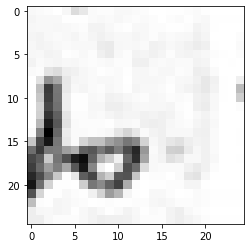

In [7]:
def resize(IMG, IMG_SIZE):
    return cv2.resize(IMG, (IMG_SIZE, IMG_SIZE))

def shufle_dataset(dataset):
    random.shuffle(dataset)
    
# shufle both dataset
shufle_dataset(train_dataset)
shufle_dataset(test_dataset)

# view the selectes sample image
view(resize(train_dataset[0][0],25))

In [8]:
def view_sample(dataset, limit):
    for sample in dataset[:limit]:
        print(sample[1])
        
# show samole of the shufled dataset's
print('train dataset sample\n')
view_sample(train_dataset, 10)
print('\n\ntest dataset sample\n')
view_sample(test_dataset, 10)

train dataset sample

168
140
191
218
153
234
211
96
207
59


test dataset sample

9
36
20
84
5
252
203
261
217
180



Training image sample
 Lable:  ኳ


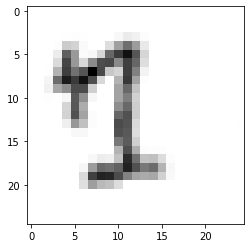


Testing image sample
 Lable:  ኽ


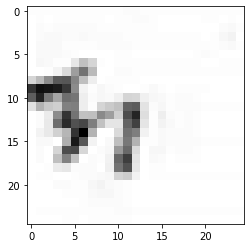

In [9]:
def split_img_and_label(dataset):
    img = []
    lable = []
    for features,label in dataset:
        img.append(features)
        lable.append(label)
    return img, lable


training_img, training_lable = split_img_and_label(train_dataset)
testing_img, testing_lable = split_img_and_label(test_dataset)

# index of sample selector
IMG_INDEX = 50
    
print('\nTraining image sample\n','Lable: ',fidel_name(training_lable[IMG_INDEX]))
view(training_img[IMG_INDEX])
    
print('\nTesting image sample\n','Lable: ',fidel_name(testing_lable[IMG_INDEX]))
view(testing_img[IMG_INDEX])

In [10]:
print('Total amount of Training image: ',len(training_img[:]),'Total amount of Training Lable: ',len(training_lable[:]))
print('Total amount of Testing image: ',len(testing_img),'Total amount of Testing Lable: ',len(testing_lable))

Total amount of Training image:  15211 Total amount of Training Lable:  15211
Total amount of Testing image:  1435 Total amount of Testing Lable:  1435


In [11]:
def views(image,label):
    print(fidel_name(label))
    plt.imshow(image)
    plt.show()

ፌ


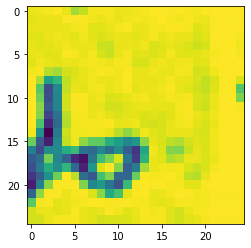

በ


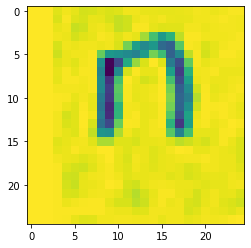

In [12]:
# (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = training_lable[:]
test_labels = testing_lable[:]

views(training_img[0],train_labels[0])

views(testing_img[0],test_labels[0])

# print(vShape(training_img[1]))

# train_images = training_img[:3444].reshape(-1, 25 * 25) / 255.0
# test_images = testing_img[:574].reshape(-1, 28 * 28) / 255.0

train_img = np.array(training_img[:]).reshape(-1, 25* 25) / 255.0
test_img = np.array(testing_img[:]).reshape(-1, 25* 25) / 255.0

15211
234
ጾ


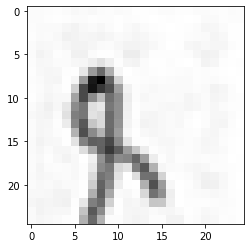

In [13]:
print(len(train_img))
# print(training_img[0],'\n')
# print(training_img)
index = 5
print(train_labels[index])
print(fidel_name(train_labels[index]))
x = train_img[index]*255
view(np.array(x).reshape(25, 25))

In [19]:
# Define a simple sequential model
def create_model():
    model = tf.keras.models.Sequential([
        keras.layers.Dense(1600, input_shape=(625,), activation='relu'),
        keras.layers.Dense(3200, activation='relu'),
        keras.layers.Dense(287, activation = 'softmax')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1600)              1001600   
_________________________________________________________________
dense_4 (Dense)              (None, 3200)              5123200   
_________________________________________________________________
dense_5 (Dense)              (None, 287)               918687    
Total params: 7,043,487
Trainable params: 7,043,487
Non-trainable params: 0
_________________________________________________________________


In [20]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
train_img = np.array(train_img)
train_labels = np.array(train_labels)
test_img = np.array(test_img)
test_labels = np.array(test_labels)


# index = 5
# print(test_labels[index])
# print(fidel_name(test_labels[index]))
# x = testing_img[index]*255
# view(np.array(x).reshape(25, 25))


# Train the model with the new callback
# model.fit(train_img,  # train it and test it with related datasets
#           train_labels,  
#           epochs=60,
#           validation_split=0.1,
#           batch_size = 100,
#           shuffle=True)  # Pass callback to training

history = model.fit(train_img, # train it and test it with indipendent datasets
                    train_labels,  
                    epochs=4,
                    batch_size = 286,
                    validation_data=(test_img, test_labels))
                      # ,  callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

54/54 [==============================] - 34s 591ms/step - loss: 5.6939 - accuracy: 0.0034 - val_loss: 5.6531 - val_accuracy: 0.0084


In [ ]:
# Menampilkan grafik loss per epochs pada saat model berlatih
plt.plot(history.history['loss']);
plt.title('Grafik Loss pada Training Model')
plt.xlabel('Epochs')
plt.ylabel('Loss');

In [21]:
os.listdir(checkpoint_dir)

['checkpoint', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index']

In [24]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

# Create a new model instance
model = create_model()

# Restore the weights
model.load_weights('./checkpoints/my_checkpoint')

# Evaluate the model
loss, acc = model.evaluate(test_img, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}% ".format(100 * acc),"Loss: {:5.2f}".format(loss))

45/45 - 4s - loss: 0.2193 - accuracy: 0.9882
Restored model, accuracy: 98.82%  Loss:  0.22


In [25]:
prediction = model.predict(x=test_img,verbose=1)

45/45 [==============================] - 7s 39ms/step


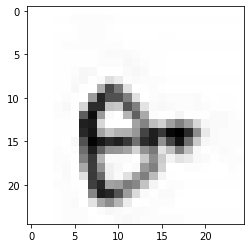

ፁ
65


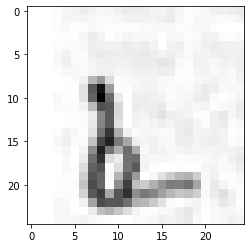

ፈ
32


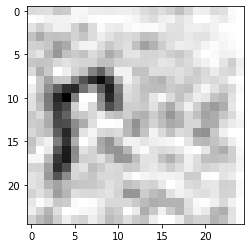

ቦ
213


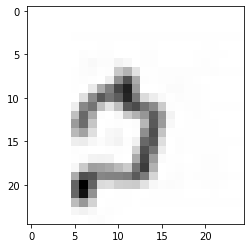

ኃ
115


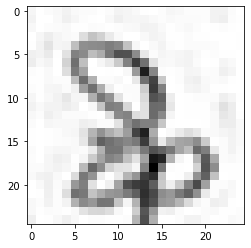

ቆ
212


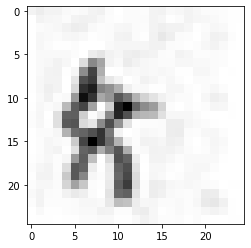

ጲ
97


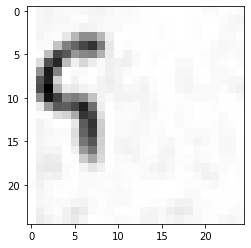

ኗ
256


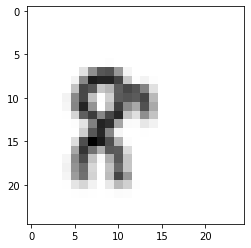

ጽ
200


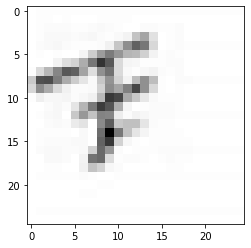

ቹ
46


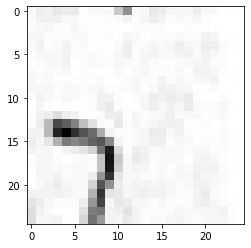

ገ
26


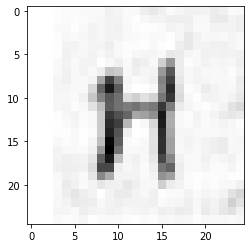

ዘ
21


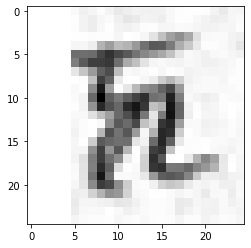

ኺ
86


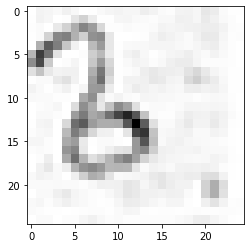

ጌ
162


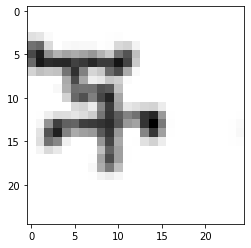

ች
182


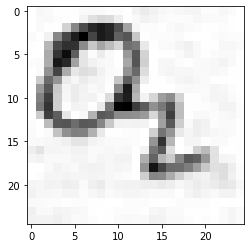

ዒ
88


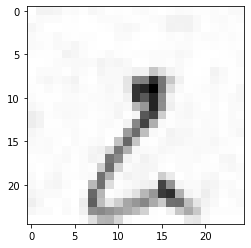

ሯ
247


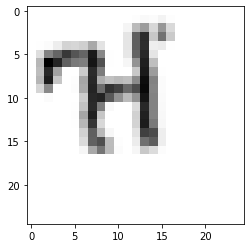

ዡ
56


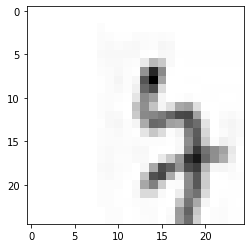

ት
181


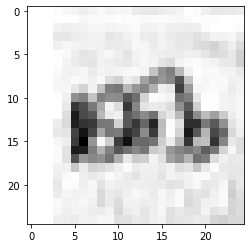

ጨ
28


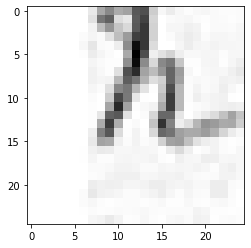

ሺ
75


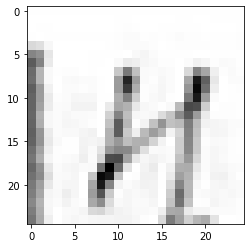

ዟ
261


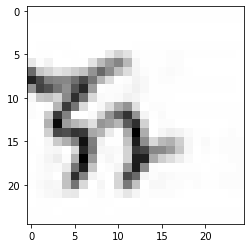

ኹ
52


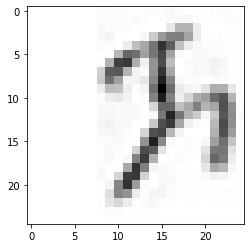

ሽ
177


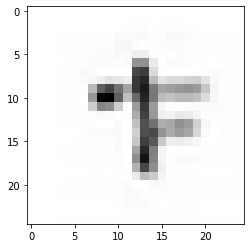

ቱ
45


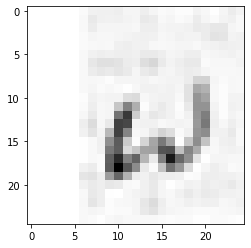

ሠ
4


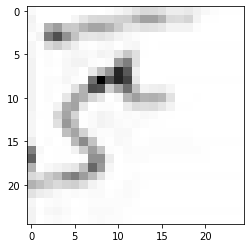

ኛ
117


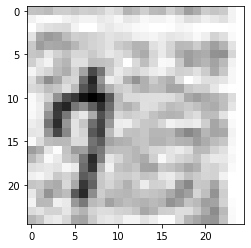

ጎ
230


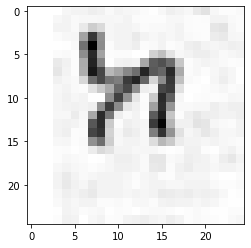

ከ
17


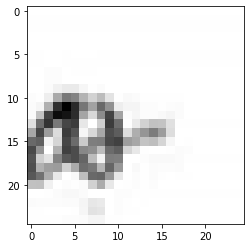

ዉ
53


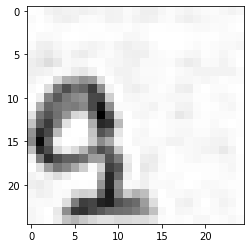

ኗ
256


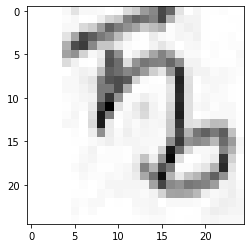

ዄ
280


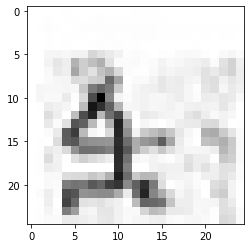

ፏ
270


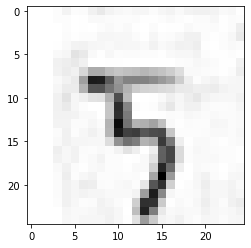

ኘ
15


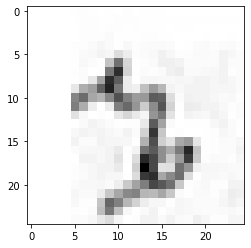

ኌ
278


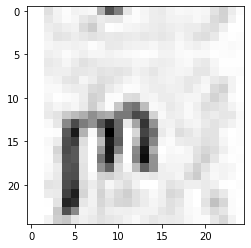

ጦ
231


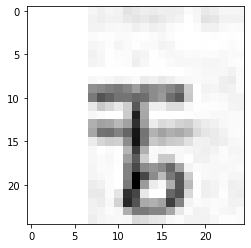

ቼ
148


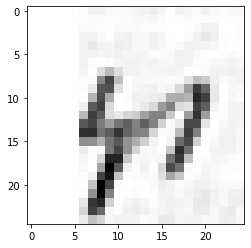

ኮ
221


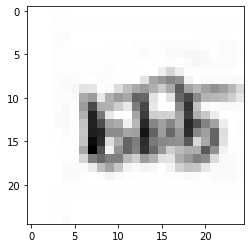

ጩ
62


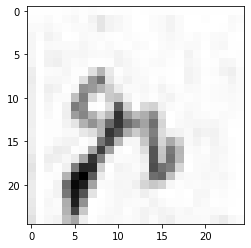

ኮ
221


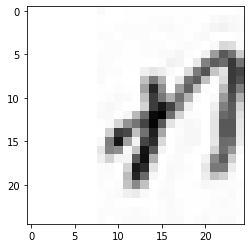

ብ
179


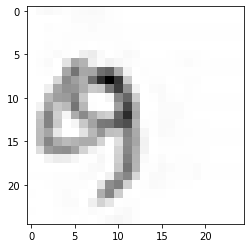

ፃ
133


In [26]:
num = 0

imgn = test_img[num]*255
#     print(imgn,vShape(imgn))
imgn = imgn.reshape(25, 25)
#     print(imgn,vShape(imgn))

num=0

for i in prediction:
    imgn = test_img[num]*255
    imgn = imgn.reshape(25, 25)
    view(imgn)
    xa = np.argmax(i, axis=0)
    print(fidel_name(xa))
    num = num+1
    print(xa)
    if num>40:
        break
#     print(len(i))
#     view(i)

In [27]:
# model(testing_img[0], training=False)
# len(testing_img[0])
# np.round(prediction)
# loss, acc = model.test_on_batch(train_img, train_labels)
loss, acc = model.test_on_batch(test_img, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

Restored model, accuracy: 98.82%


In [28]:

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.h5') 

# Load a model and use it

In [26]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('45.65%.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1600)              1001600   
_________________________________________________________________
dense_4 (Dense)              (None, 3200)              5123200   
_________________________________________________________________
dense_5 (Dense)              (None, 287)               918687    
Total params: 7,043,487
Trainable params: 7,043,487
Non-trainable params: 0
_________________________________________________________________


In [27]:
loss, acc = new_model.test_on_batch(test_img, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

Restored model, accuracy: 67.25%


45/45 [==============================] - 2s 42ms/step


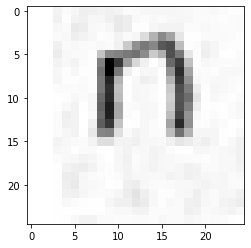

በ
Predicted:-  9
Actual:-  9


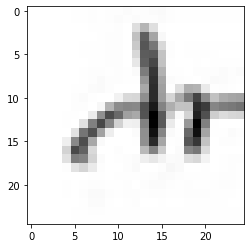

ሑ
Predicted:-  36
Actual:-  36


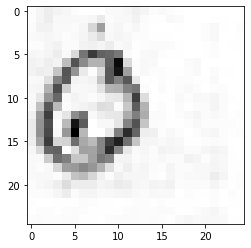

ዐ
Predicted:-  20
Actual:-  20


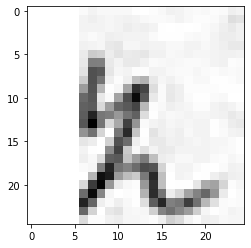

ኢ
Predicted:-  84
Actual:-  84


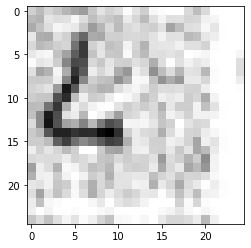

ረ
Predicted:-  5
Actual:-  5


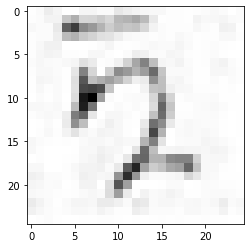

ኚ
Predicted:-  83
Actual:-  252


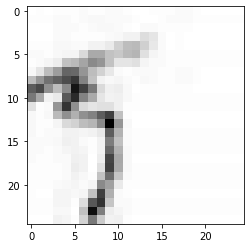

ኘ
Predicted:-  15
Actual:-  203


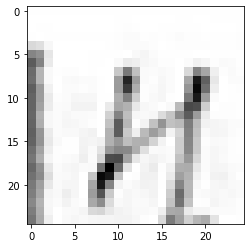

ኵ
Predicted:-  284
Actual:-  261


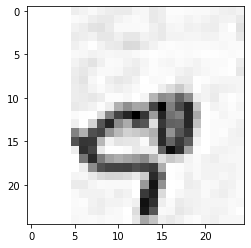

ኆ
Predicted:-  217
Actual:-  217


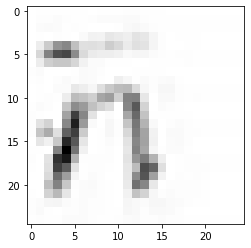

ቭ
Predicted:-  180
Actual:-  180


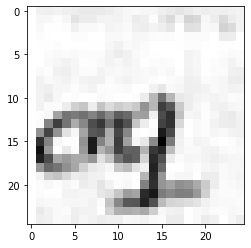

ሟ
Predicted:-  245
Actual:-  245


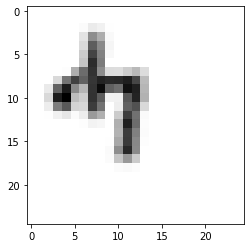

ሓ
Predicted:-  104
Actual:-  104


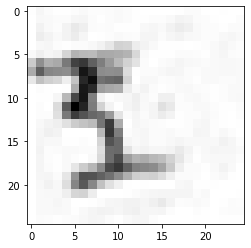

ኜ
Predicted:-  151
Actual:-  257


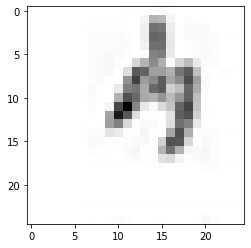

ሳ
Predicted:-  108
Actual:-  108


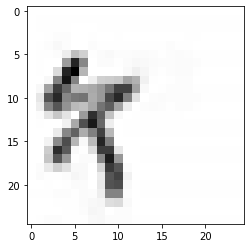

ዛ
Predicted:-  123
Actual:-  118


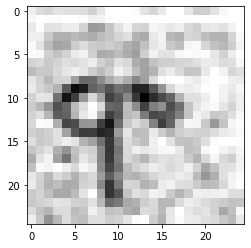

ሞ
Predicted:-  207
Actual:-  207


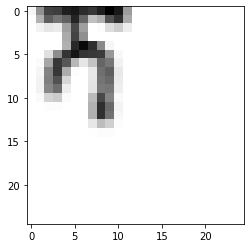

ሻ
Predicted:-  109
Actual:-  109


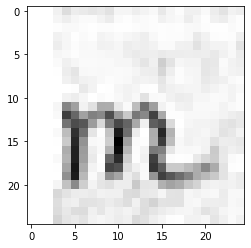

ጢ
Predicted:-  95
Actual:-  95


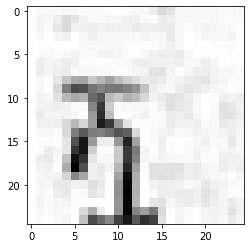

ሿ
Predicted:-  249
Actual:-  249


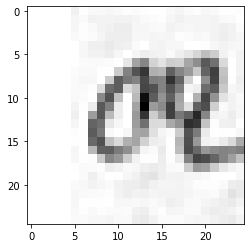

ሚ
Predicted:-  71
Actual:-  71


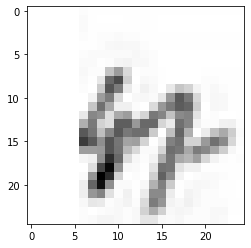

ኩ
Predicted:-  51
Actual:-  51


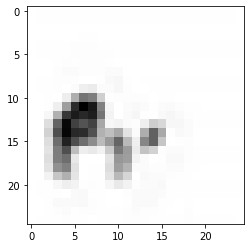

ሒ
Predicted:-  70
Actual:-  58


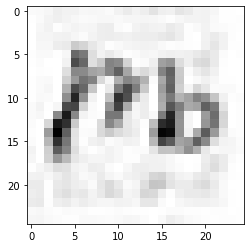

ጢ
Predicted:-  95
Actual:-  163


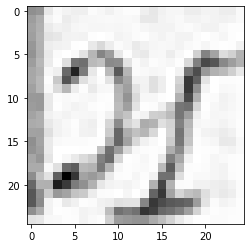

ሀ
Predicted:-  0
Actual:-  262


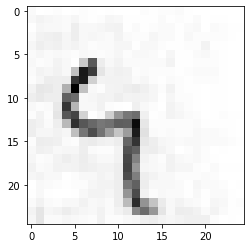

ነ
Predicted:-  14
Actual:-  14


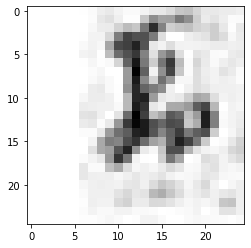

ጄ
Predicted:-  161
Actual:-  161


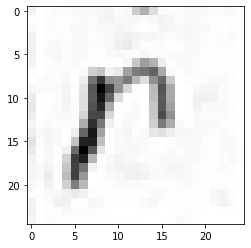

ቦ
Predicted:-  213
Actual:-  213


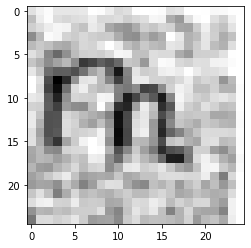

ጢ
Predicted:-  95
Actual:-  95


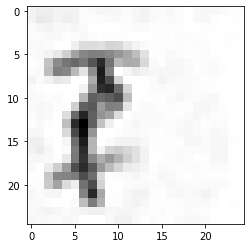

ፆ
Predicted:-  235
Actual:-  216


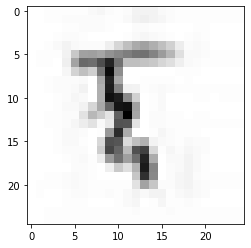

ኚ
Predicted:-  83
Actual:-  185


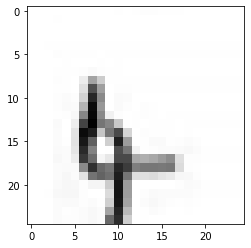

ፋ
Predicted:-  134
Actual:-  134


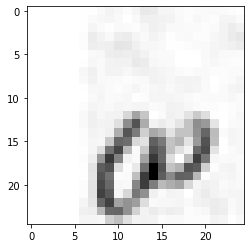

ወ
Predicted:-  19
Actual:-  19


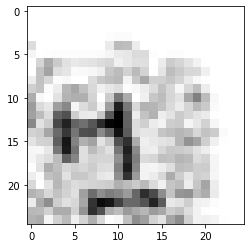

ኴ
Predicted:-  279
Actual:-  261


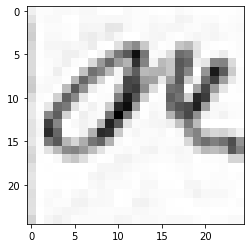

ሙ
Predicted:-  37
Actual:-  71


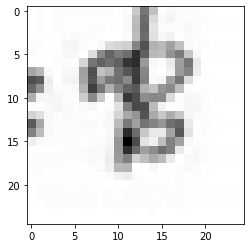

ጥ
Predicted:-  197
Actual:-  238


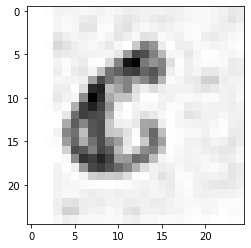

ፎ
Predicted:-  236
Actual:-  236


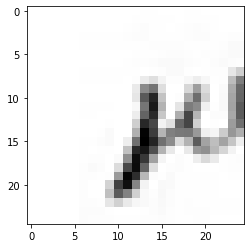

ሥ
Predicted:-  174
Actual:-  174


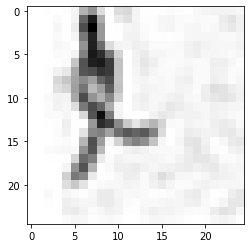

ጶ
Predicted:-  233
Actual:-  233


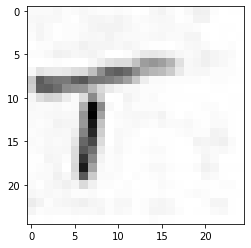

ፐ
Predicted:-  33
Actual:-  33


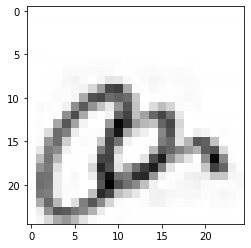

ኵ
Predicted:-  284
Actual:-  189


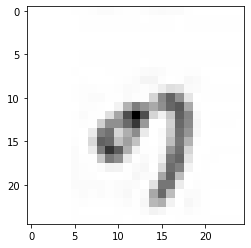

ግ
Predicted:-  196
Actual:-  196


In [29]:
prediction = new_model.predict(x=test_img,verbose=1)

num=0

imgn = test_img[num]*255
#     print(imgn,vShape(imgn))
imgn = imgn.reshape(25, 25)
#     print(imgn,vShape(imgn))

for i in prediction:
    imgn = test_img[num]*255
    imgn = imgn.reshape(25, 25)
    view(imgn)
    xa = np.argmax(i, axis=0)
    print(fidel_name(xa))
    print("Predicted:- ", xa)
    print("Actual:- ", str(test_labels[num]))
    num = num+1
    if num>40:
        break
#     print(len(i))
#     view(i)